In [1]:
using ShipMMG

using Plots
using LaTeXStrings

# KT model
$$ T\dot{r}+r = K\delta$$


## ODE
- $\dot{x}=u \cos{\theta}$
- $\dot{y}=u \sin{\theta}$
- $\dot{\Psi}=r$
- $\dot{u}=0$
- $\dot{r}=\frac{1}{T}(-r+K\delta)$
- $\dot{\delta}=\textrm{KNOWN}$

## KT Simulation Example

In [2]:
K_log = 0.155  # [1/s]
T_log = 80.5  # [s]
ship_shape = [20,5] # [L[m],B[m]] for visualizing only..
;

### Case 1
- $u(t)=10 \textrm{[knot]}$
- $\delta(t) = 10 \frac{\pi}{180} \sin(\frac{2\pi}{T_s}t)\textrm{[rad]}$

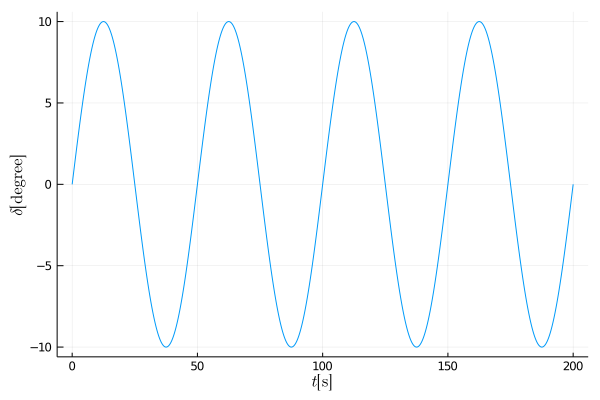

In [3]:
u0 = 10 * (1852.0 / 3600)  # [m/s] (knot * 1852/3600)

duration = 200  # [s]
sampling = 10000
time_list = range(0.0,stop=duration,length=sampling)
Ts = 50.0
δ_list = 10.0 * π / 180.0  * sin.(2.0 * π / Ts * time_list) # [rad]

plot(time_list, rad2deg.(δ_list), xlabel = L"t \textrm{[s]}", ylabel=L"\delta \textrm{[degree]}", label="")

In [4]:
@time time, x, y, ψ, u, r, δ = kt_simulate(time_list, δ_list, K_log, T_log, u0);

  3.843735 seconds (13.95 M allocations: 692.281 MiB, 4.09% gc time)


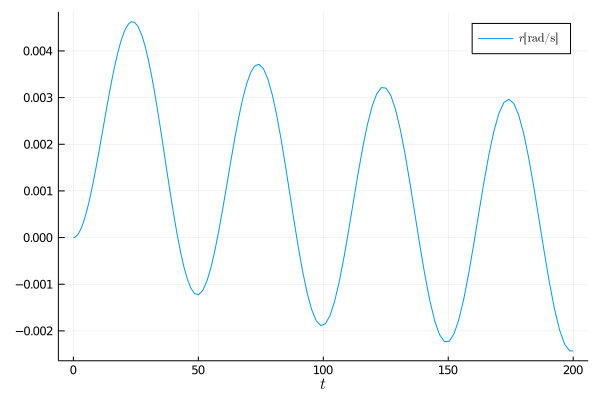

In [5]:
plot(time, r, xlabel=L"t", label=L" r \textrm{[rad/s]}")

┌ Info: Saved animation to 
│   fn = /home/mitsuyuki/Documents/workspace/ShipMMG/example/kt_case1.gif
└ @ Plots /home/mitsuyuki/.julia/packages/Plots/4EfKl/src/animation.jl:104


Plots.AnimatedGif("/home/mitsuyuki/Documents/workspace/ShipMMG/example/kt_case1.gif")
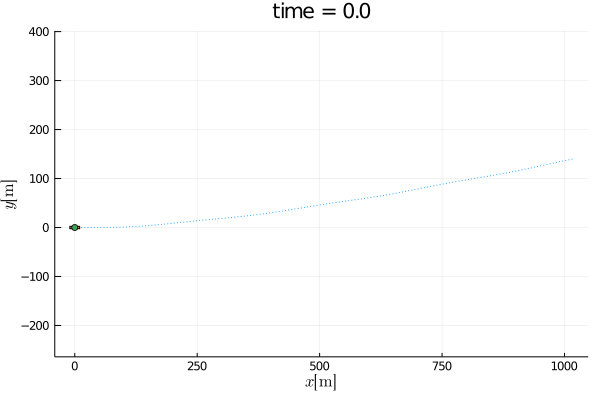

In [6]:
draw_gif_result(time, x, y, ψ, ship_shape, "kt_case1.gif")

### Case 2
- $u(t)=10 \textrm{[knot]}$
- $\delta(t) = 15 \textrm{[degree]}$

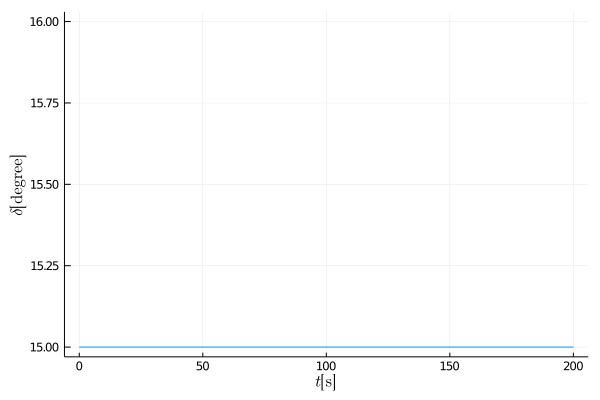

In [7]:
u0 = 10 * (1852.0 / 3600)  # [m/s] (knot * 1852/3600)

duration = 200
time_list = range(0.0,stop=duration,length=sampling)
δ_list = deg2rad(15)* ones(sampling)

plot(time_list, rad2deg.(δ_list), xlabel = L"t \textrm{[s]}", ylabel=L"\delta \textrm{[degree]}", label="")

In [8]:
@time time, x, y, ψ, u, r, δ = kt_simulate(time_list, δ_list, K_log, T_log, u0);

  0.033684 seconds (113.26 k allocations: 7.003 MiB)


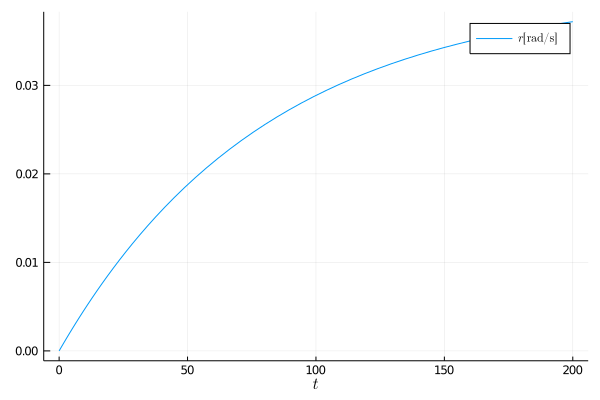

In [9]:
plot(time, r, xlabel=L"t", label=L" r \textrm{[rad/s]}")

┌ Info: Saved animation to 
│   fn = /home/mitsuyuki/Documents/workspace/ShipMMG/example/kt_case2.gif
└ @ Plots /home/mitsuyuki/.julia/packages/Plots/4EfKl/src/animation.jl:104


Plots.AnimatedGif("/home/mitsuyuki/Documents/workspace/ShipMMG/example/kt_case2.gif")
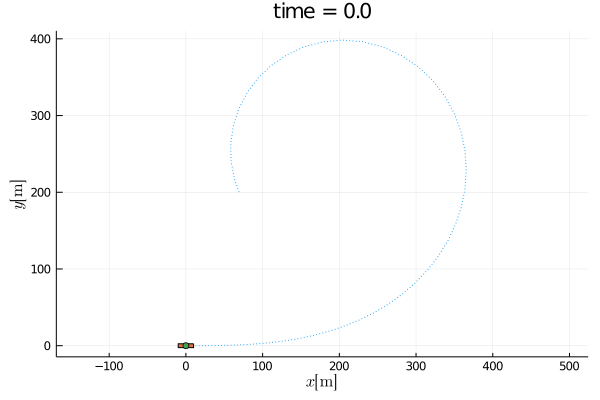

In [11]:
draw_gif_result(time, x, y, ψ, ship_shape, "kt_case2.gif")